In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf.scf import hf

import matplotlib as mpl
mpl.style.use("seaborn")

from SCFInitialGuess.utilities.analysis import density_cut, matrix_error

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
molecules = np.load("../data/molecules.npy")
S = np.load("../data/S.npy")
P = np.load("../data/P.npy")


In [ ]:
index = 180
dim = 26


mol = molecules[index]#.get_pyscf_molecule()
s = S[index].reshape(dim, dim)
p = P[index].reshape(dim, dim)

In [2]:
z_value = 0.4
nx = 80
ny = 80

In [3]:
from pyscf.gto import Mole

mole = Mole()
mole.atom = """
C       -0.5809229194      2.2786702584     -0.0000000000                 
C        0.3341762014      1.1498668226     -0.0000000000                 
C       -1.8814381635      2.1217429837      0.0000000000                 
H       -0.2617503274      3.3158480899      0.0000000000                 
H       -2.2118065230      1.0964193501      0.0000000000                 
H       -2.5555793591      2.9807928012     -0.0000000000                 
C        1.6346915572      1.3067927385      0.0000000000                 
H        0.0150027543      0.1126892373      0.0000000000                 
H        1.9650613410      2.3321158857      0.0000000000                 
H        2.3088316989      0.4477420354     -0.0000000000"""
mole.basis = "6-311++g**"
mole.build()

Warn: Ipython shell catchs sys.args


# H_core

In [44]:
dm_1e = hf.init_guess_by_1e(mole)
dm_1e_density, x, y = density_cut(mole, dm_1e, nx, ny, z_value=3)

In [45]:
np.max(dm_1e_density), np.min(dm_1e_density)


(54.27524071911808, 7.468120745630099e-08)

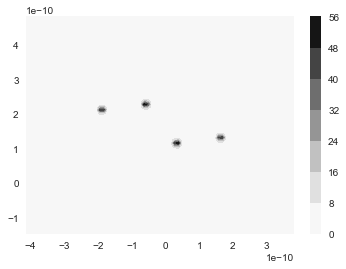

In [47]:
norm = None#plt.Normalize(0, 7.6e-5)
plt.contourf(*np.meshgrid(x, y), dm_1e_density, norm=norm)
plt.colorbar()
plt.show()

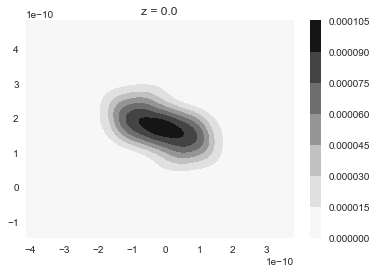

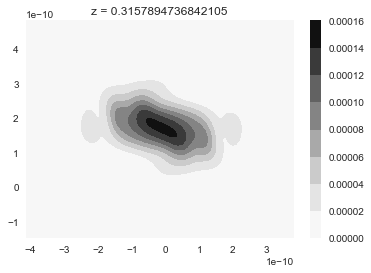

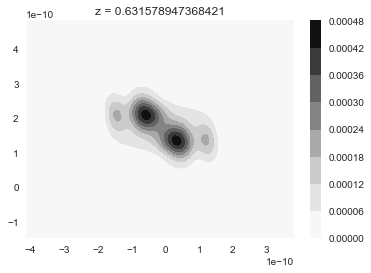

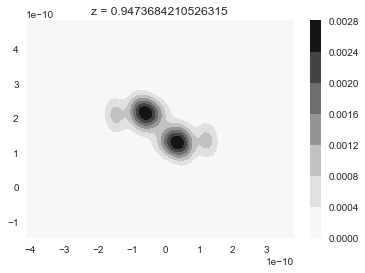

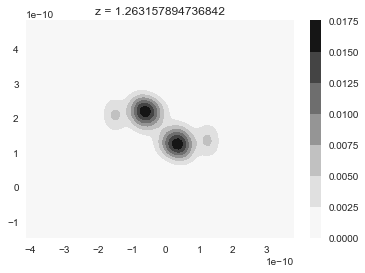

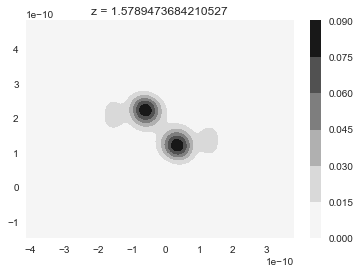

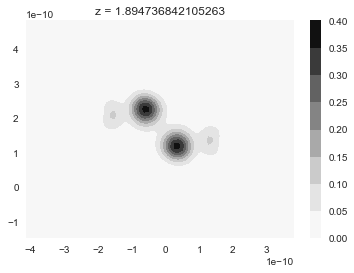

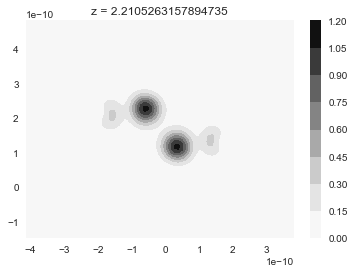

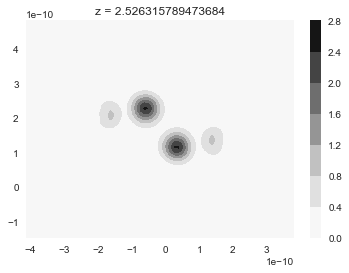

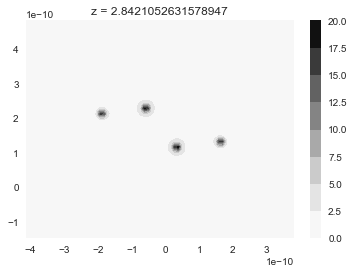

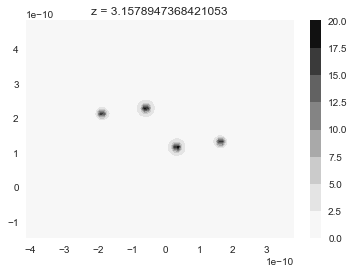

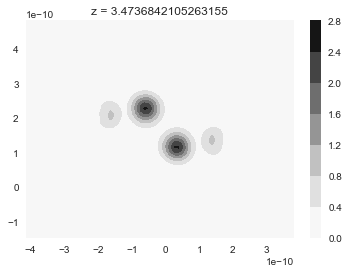

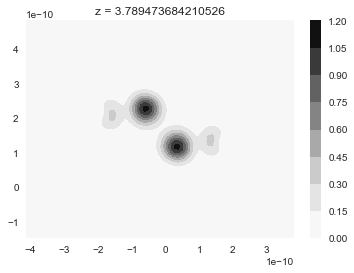

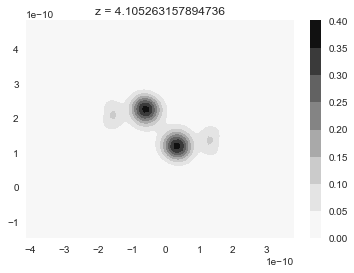

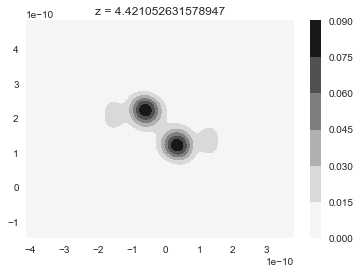

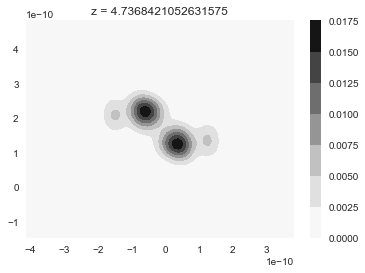

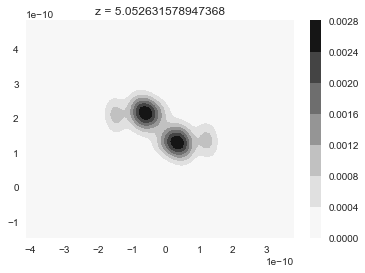

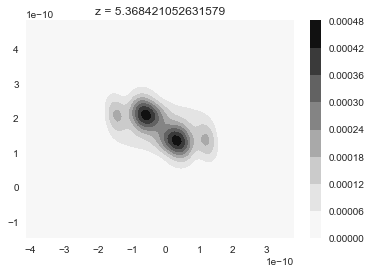

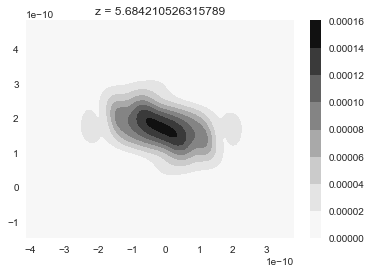

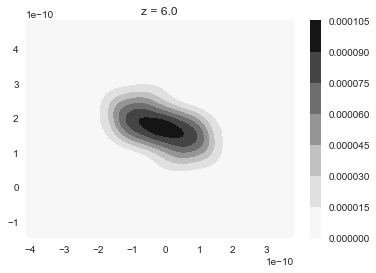

In [13]:
for z in np.linspace(0,6, 20):
    
    dm_1e = hf.init_guess_by_1e(mole)
    dm_1e_density, x, y = density_cut(mole, dm_1e, nx, ny, z_value=z)
    plt.figure()
    plt.contourf(*np.meshgrid(x, y), dm_1e_density)
    plt.colorbar()
    plt.title("z = " + str(z))
plt.show()

# H_SAP

In [ ]:
dm_sap = hf.init_guess_by_atom(mol.get_pyscf_molecule())
dm_sap_density = calculate_electrondensity_xy_plane(mol.get_pyscf_molecule(), dm_sap, nx, ny)

In [ ]:
plt.contourf(dm_sap_density)
plt.colorbar()
plt.show()

# H_GWH

In [ ]:
dm_gwh = hf.init_guess_by_wolfsberg_helmholtz(mol.get_pyscf_molecule())
dm_gwh_density = calculate_electrondensity_xy_plane(mol.get_pyscf_molecule(), dm_gwh, nx, ny)

In [ ]:
plt.contourf(dm_gwh_density)
plt.colorbar()
plt.show()

# H_MINAO

In [ ]:
dm_minao = hf.init_guess_by_minao(mol.get_pyscf_molecule())
dm_minao_density = calculate_electrondensity_xy_plane(mol.get_pyscf_molecule(), dm_minao, nx, ny)

In [ ]:
plt.contourf(dm_minao_density)
plt.colorbar()
plt.show()

# get rho


In [ ]:
from pyscf.dft import gen_grid, numint

def get_density(mole, dm, nx, ny):
    #mole = mol.get_pyscf_molecule()
    geometry = mole.atom_coords()
    lower = np.min(geometry, axis=0)
    upper = np.max(geometry, axis=0)
    x = np.linspace(lower[0], upper[0], nx)
    y = np.linspace(lower[1], upper[1], ny)
    z = 0


    X, Y = np.meshgrid(x, y)
    grid = np.array(list(zip(X.flatten(), Y.flatten(), z * np.ones(X.shape).flatten())))
    grid =  np.asarray(grid, order='C') 
    ao = numint.eval_ao(mole, grid)
    rho = numint.eval_rho(mole, ao, dm_test)
    return rho


In [ ]:
from pyscf.gto import Mole

mole = Mole()
mole.atom = """
C       -0.5809229194      2.2786702584     -0.0000000000                 
C        0.3341762014      1.1498668226     -0.0000000000                 
C       -1.8814381635      2.1217429837      0.0000000000                 
H       -0.2617503274      3.3158480899      0.0000000000                 
H       -2.2118065230      1.0964193501      0.0000000000                 
H       -2.5555793591      2.9807928012     -0.0000000000                 
C        1.6346915572      1.3067927385      0.0000000000                 
H        0.0150027543      0.1126892373      0.0000000000                 
H        1.9650613410      2.3321158857      0.0000000000                 
H        2.3088316989      0.4477420354     -0.0000000000"""
mole.basis = "6-311++g**"
mole.build()


nx, ny = 800, 800
rho = get_density(mole, dm_test, nx, ny)

vmax = 2
rho[rho > vmax] = vmax

norm = plt.Normalize(0, vmax)
plt.contourf(X, Y, rho.reshape(nx, ny), norm=norm)
plt.colorbar()
plt.show()


In [ ]:
rho = get_density(mole, hf.init_guess_by_1e(mole), nx, ny)

vmax = 2
rho[rho > vmax] = vmax

norm = plt.Normalize(0, vmax)
plt.contourf(X, Y, rho.reshape(nx, ny), norm=norm)
plt.colorbar()
plt.show()

In [ ]:
rho = get_density(mole, hf.init_guess_by_minao(mole), nx, ny)

vmax = 2
rho[rho > vmax] = vmax

norm = plt.Normalize(0, vmax)
plt.contourf(X, Y, rho.reshape(nx, ny), norm=norm)
plt.colorbar()
plt.savefig("/home/jo/Repos/cc2aiPoster/densities/butadien_density_dummy.pdf")
plt.show()